<h1> TASK-3 To Explore Unsupervised Machine Learning </h1>

<h2> importing libraries </h2>

In [108]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

<h2> Loading the dataset </h2>

In [109]:
iris= pd.read_csv('Iris.csv')
iris.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [110]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h2> Scatter plot </h2>

Text(0.5, 1.0, 'Data Cluster')

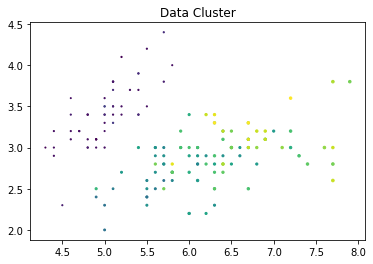

In [111]:

plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'],iris['PetalLengthCm'],iris['PetalWidthCm'])
plt.title('Data Cluster')

<h2> Visualization </h2>

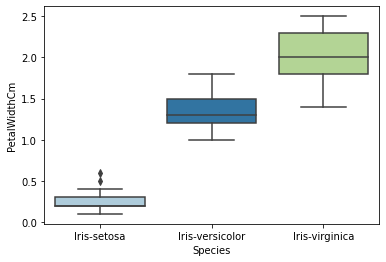

In [112]:
sns.boxplot(x="Species", y="PetalWidthCm", palette="Paired", data=iris)

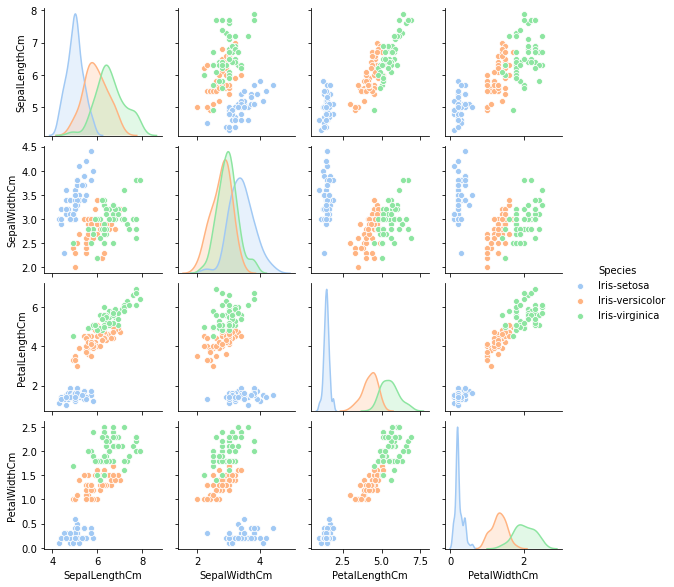

In [113]:
import warnings
sns.pairplot(iris.drop('Id',axis=1),hue="Species",palette="pastel", size=2, diag_kind="kde")


<h2> Optimizing Clusters </h2>

In [114]:
k = KMeans(n_clusters=3)
x = k.fit_predict(iris[['PetalLengthCm','PetalWidthCm']])
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:

iris['cluster'] = x
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0


In [116]:
iris.cluster.unique()

array([0, 2, 1])

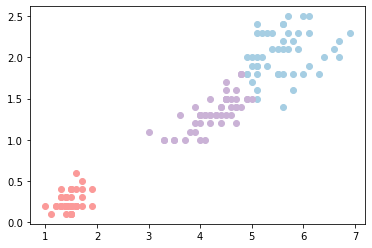

In [117]:
iris1 = iris[iris.cluster==0]
iris2 = iris[iris.cluster==1]
iris3 = iris[iris.cluster==2]
plt.scatter(iris1['PetalLengthCm'],iris1['PetalWidthCm'],color='#fb9a99')
plt.scatter(iris2['PetalLengthCm'],iris2['PetalWidthCm'],color='#a6cee3')
plt.scatter(iris3['PetalLengthCm'],iris3['PetalWidthCm'],color='#cab2d6')

<h2>  Elbow method - To find optimal number of clusters </h2>


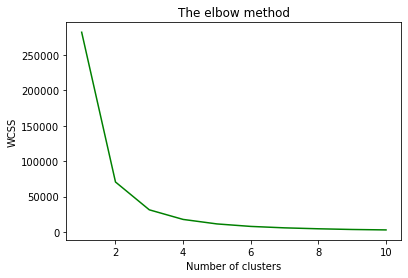

In [139]:

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, color ='g')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()